In [1]:
import pandas as pd

In [2]:
data =pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [20]:
data['Chance of Admit '].value_counts()

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: Chance of Admit , Length: 61, dtype: int64

In [21]:
data['Chance of Admit '].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [22]:
X=data.drop('Chance of Admit ',axis=1)

In [23]:
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [24]:
y=data['Chance of Admit ']

In [25]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=35)

In [27]:
X_test.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
77,78,301,99,2,3.0,2.0,8.22,0
441,442,332,112,1,1.5,3.0,8.66,1
164,165,329,111,4,4.5,4.0,9.01,1
273,274,312,99,1,1.0,1.5,8.01,1
6,7,321,109,3,3.0,4.0,8.20,1


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [31]:
X_train_tf=scaler.fit_transform(X_train)

In [33]:
X_test_tf=scaler.transform(X_test)

In [36]:
from sklearn.svm import SVR

In [37]:
model= SVR()

In [38]:
model.fit(X_train_tf,y_train)

SVR()

In [40]:
model.score(X_train_tf,y_train)

0.8190169495464712

In [44]:
y_predict= model.predict(X_test_tf)

In [45]:
y_predict

array([0.54585987, 0.68241832, 0.85033595, 0.55829808, 0.70000676,
       0.62450384, 0.62174802, 0.65486188, 0.65220521, 0.54749142,
       0.88712931, 0.59445223, 0.61137167, 0.77120533, 0.73400285,
       0.63308928, 0.63251148, 0.80503876, 0.8159992 , 0.53483   ,
       0.66999282, 0.54679596, 0.63222213, 0.86801382, 0.71999735,
       0.83737632, 0.63341344, 0.49147798, 0.73772477, 0.78561431,
       0.75887835, 0.74894268, 0.87033174, 0.60154147, 0.52467824,
       0.49141484, 0.61102542, 0.88666241, 0.87500563, 0.75594275,
       0.68592777, 0.83365877, 0.61742006, 0.781887  , 0.70114669,
       0.56394472, 0.67999895, 0.73554241, 0.85892682, 0.62807501,
       0.73170629, 0.5077374 , 0.73436511, 0.78205333, 0.88588097,
       0.68533372, 0.85292401, 0.55162945, 0.77929314, 0.52801442,
       0.59475256, 0.84123939, 0.87866241, 0.74356616, 0.81112267,
       0.88391421, 0.86172873, 0.76566884, 0.80183084, 0.57120838,
       0.6334304 , 0.70456594, 0.71299596, 0.79191184, 0.51052

# Assumption for linera regression model is good or not

In [52]:
import matplotlib.pyplot as plt 
%matplotlib inline

Text(0, 0.5, 'linear prediction')

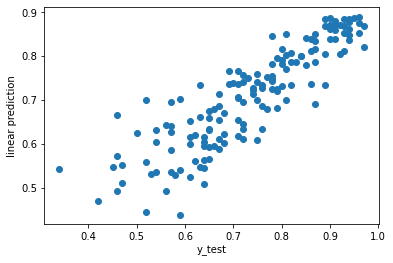

In [53]:
plt.scatter(y_test,  y_predict)
plt.xlabel("y_test")
plt.ylabel("linear prediction")

In [54]:
residuals = y_test- y_predict

In [55]:
residuals

77     0.094140
441    0.107582
164   -0.040336
273   -0.038298
6      0.049993
         ...   
465   -0.065304
314   -0.019389
239    0.049409
99    -0.005327
74     0.026683
Name: Chance of Admit , Length: 150, dtype: float64

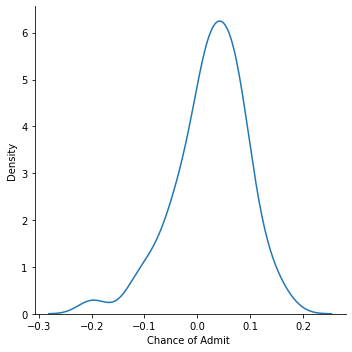

In [58]:
import seaborn as sns
sns.displot(residuals, kind = "kde")

In [59]:
## assumption on prediction and residual
## uniform distribution

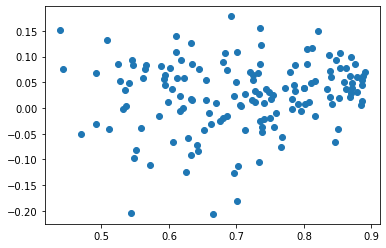

In [61]:
plt.scatter(y_predict, residuals)    ## there is not any kind of special shape in distribution so model is good

# performace matrix

In [63]:
import numpy as np

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))
print(np.sqrt(mean_squared_error(y_test,y_predict)))

0.005271183079603326
0.058789522255087844
0.0726029137129036


# R square and adjusted R square

In [65]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
score

0.7331194283454017

In [67]:
# adjusted R squre 
def adj_r2(x,y):
    r2= model.score(x,y)
    n= x.shape[0]  # number of rows
    p= x.shape[1]  # number of columns
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

adj_r2(X_test_tf, y_test)

0.7179772682515237

# Rigde

In [68]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [74]:
ridge.fit(X_train_tf,y_train)

Ridge()

In [75]:
ridge_y=ridge.predict(X_test_tf)

In [76]:
ridge_y

array([0.56778513, 0.76442866, 0.83024047, 0.57205247, 0.6898051 ,
       0.62126169, 0.66380312, 0.67828373, 0.6664778 , 0.49235212,
       0.97325742, 0.60936122, 0.64100531, 0.77739442, 0.69549423,
       0.68440225, 0.60936194, 0.82788267, 0.82544373, 0.51490454,
       0.68490318, 0.5595349 , 0.6308347 , 0.88785358, 0.72893908,
       0.91495705, 0.64726353, 0.53984802, 0.74240549, 0.84740247,
       0.73025494, 0.69648751, 0.8835057 , 0.64902966, 0.55961266,
       0.40591186, 0.68038144, 0.91758025, 0.94703773, 0.73167932,
       0.60726123, 0.80852711, 0.63217825, 0.77512804, 0.72417703,
       0.64085501, 0.69976798, 0.7170443 , 0.91157704, 0.68730678,
       0.79578917, 0.52194984, 0.78674019, 0.79539364, 0.90895921,
       0.6779239 , 0.96611838, 0.6106865 , 0.79519065, 0.54634916,
       0.65040097, 0.82271978, 0.94425855, 0.7903418 , 0.84528223,
       0.91150425, 0.94786474, 0.77379017, 0.80378951, 0.58978282,
       0.71149864, 0.72808548, 0.7369008 , 0.78459654, 0.48115

# Assumption for ridge is good or not

Text(0, 0.5, 'Ridge prediction')

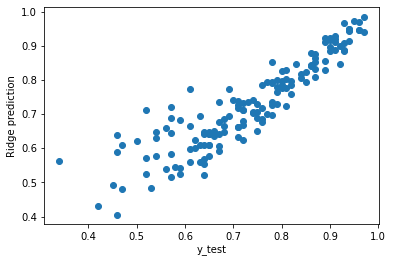

In [78]:
plt.scatter(y_test, ridge_y)
plt.xlabel("y_test")
plt.ylabel("Ridge prediction")

In [79]:
## residuals
residuals = y_test- ridge_y  # will get error

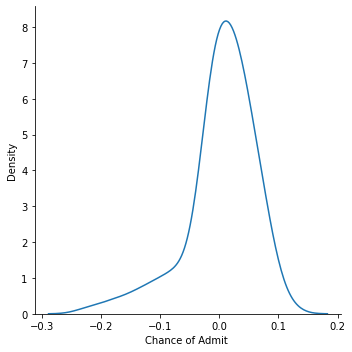

In [80]:
sns.displot(residuals, kind = "kde")

# Assumption for linear regression
### term where data is uniformly distributed term called homosadacity

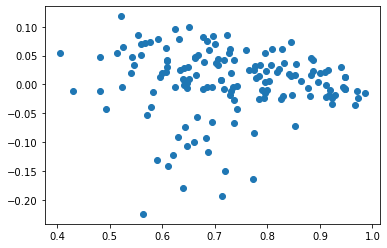

In [81]:
plt.scatter(ridge_y, residuals)    ## there is no shape in distribution so model is good

# performace matrix

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [84]:
print(mean_squared_error(y_test, ridge_y))
print(mean_absolute_error(y_test, ridge_y))
print(np.sqrt(mean_squared_error(y_test,ridge_y)))

0.003439119611075864
0.04272237834940578
0.05864400746091508


In [85]:
# R square and adjusted R square
# R square and adjusted R square
from sklearn.metrics import r2_score
score = r2_score(y_test,ridge_y)
score

0.8258770006786529

In [90]:
# adjusted R squre 
def adj_r2(x,y):
    r2= ridge.score(x,y)
    n= x.shape[0]  # number of rows
    p= x.shape[1]  # number of columns
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

adj_r2(X_test_tf, y_test)

0.8159976815682218